# 1. Make directories

In [1]:
import os

In [2]:
curr_path = os.getcwd()

In [3]:
curr_path

'C:\\Users\\dell\\Desktop\\projects\\Breaking_captcha'

In [13]:
os.makedirs('data')

In [29]:
curr_path = curr_path+'\\data'

In [45]:
for i in range(2,10):
    fn = os.path.join(curr_path, str(i))
    #print(fn)
    os.makedirs(fn)

In [46]:
import string
alpha = list(string.ascii_uppercase)

In [48]:
for i in alpha:
    if i not in ['O', 'I']:
        fn = os.path.join(curr_path, i)
        os.makedirs(fn)

we created a 32 folders to store the data

# 2. Transform data

In [4]:
import glob
import cv2
import imutils

In [5]:
curr_path = os.path.join(os.getcwd(),'captchas')

In [6]:
captcha_image_files = glob.glob(os.path.join(curr_path, "*"))

we split the captcha image so that that each letter is a separate image, then we only have to train the neural network to recognize a single letter at a time.

In [16]:
lettre_Folder_path = os.path.join(os.getcwd(), 'data')
counts = {}

for (i,path) in enumerate(captcha_image_files):
    print("[INFO] processing image {}/{}".format(i + 1, len(captcha_image_files)))
    
    # grab the base filename as the text
    filename = os.path.basename(path)
    label = os.path.splitext(filename)[0]
    
    # load the image and convert it to grayscale
    image = cv2.imread(path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # make a border
    gray = cv2.copyMakeBorder(gray, 8,8,8,8, cv2.BORDER_REPLICATE)
    # threshold the image (convert it to pure black and white)
    thres = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    # find the contours (continuous blobs of pixels) the image
    cnts, hierarchy = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #contours = contours[0] if imutils.is_cv2() else contours[1]

    #print(contours)
    lettre_image_contours = []
    for contour in cnts:
        (x, y, w, h) = cv2.boundingRect(contour)
        # condition
        
        if w/h > 1.25:
            half_w = int(w/2)
            lettre_image_contours.append((x, y, half_w, h))
            lettre_image_contours.append((x + half_w, y, half_w, h))

        else:
            lettre_image_contours.append((x, y, w, h))

    # # If we found more or less than 4 letters in the captcha, Skip the image
    if len(lettre_image_contours) != 4:
        continue


    lettre_image_contours = sorted(lettre_image_contours, key=lambda x: x[0])
    
    # Save out each letter as a single image
    for lettre_box, lettre in zip(lettre_image_contours, label):
        x, y, w, h = lettre_box
        
        letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]

        # Get the folder to save the image in
        save_path = os.path.join(lettre_Folder_path, lettre)
        """
        # if the output directory does not exist, create it
        if not os.path.exists(save_path):
            os.makedirs(save_path)"""

        # write the letter image to a file
        count = counts.get(lettre, 1)
        p = os.path.join(save_path, "{}.png".format(str(count).zfill(6)))
        cv2.imwrite(p, letter_image)

        # increment the count for the current key
        counts[lettre] = count + 1


[INFO] processing image 1/65
[INFO] processing image 2/65
[INFO] processing image 3/65
[INFO] processing image 4/65
[INFO] processing image 5/65
[INFO] processing image 6/65
[INFO] processing image 7/65
[INFO] processing image 8/65
[INFO] processing image 9/65
[INFO] processing image 10/65
[INFO] processing image 11/65
[INFO] processing image 12/65
[INFO] processing image 13/65
[INFO] processing image 14/65
[INFO] processing image 15/65
[INFO] processing image 16/65
[INFO] processing image 17/65
[INFO] processing image 18/65
[INFO] processing image 19/65
[INFO] processing image 20/65
[INFO] processing image 21/65
[INFO] processing image 22/65
[INFO] processing image 23/65
[INFO] processing image 24/65
[INFO] processing image 25/65
[INFO] processing image 26/65


[INFO] processing image 9932/65
[INFO] processing image 9933/65
[INFO] processing image 9934/65
[INFO] processing image 9935/65
[INFO] processing image 9936/65
[INFO] processing image 9937/65
[INFO] processing image 9938/65
[INFO] processing image 9939/65
[INFO] processing image 9940/65
[INFO] processing image 9941/65
[INFO] processing image 9942/65
[INFO] processing image 9943/65
[INFO] processing image 9944/65
[INFO] processing image 9945/65
[INFO] processing image 9946/65
[INFO] processing image 9947/65
[INFO] processing image 9948/65
[INFO] processing image 9949/65
[INFO] processing image 9950/65
[INFO] processing image 9951/65
[INFO] processing image 9952/65
[INFO] processing image 9953/65
[INFO] processing image 9954/65
[INFO] processing image 9955/65


In [15]:
data_path = os.path.join(os.getcwd(),'data')

In [24]:
data_folders = glob.glob(os.path.join(data_path, "*"))

How many images do we have in each folder ?

In [30]:
for i in data_folders:
    l = glob.glob(os.path.join(i, "*"))
    print("Folder {0} has {1}".format(i[-1],len(l)))

Folder 2 has 1204
Folder 3 has 1203
Folder 4 has 1197
Folder 5 has 1231
Folder 6 has 1160
Folder 7 has 1284
Folder 8 has 1214
Folder 9 has 1357
Folder A has 1188
Folder B has 1199
Folder C has 1202
Folder D has 1199
Folder E has 1261
Folder F has 1177
Folder G has 1224
Folder H has 1221
Folder J has 1115
Folder K has 1220
Folder L has 1198
Folder M has 1170
Folder N has 1249
Folder P has 1244
Folder Q has 1208
Folder R has 1221
Folder S has 1227
Folder T has 1220
Folder U has 1199
Folder V has 1154
Folder W has 1147
Folder X has 1207
Folder Y has 1218
Folder Z has 1226


This is a function that we'll use it before training the data

In [7]:
def preprocessImage(image, width, height):
    h,w = image.shape[:2]
    
    if w > h:
        image = imutils.resize(image, width=width)
    else:
        image = imutils.resize(image, height=height)
        
    
    padW = int((width-image.shape[1])/2.0)
    padH = int((height-image.shape[0])/2.0)
    # Make border
    image = cv2.copyMakeBorder(image, padH, padH, padW, padW, cv2.BORDER_REPLICATE)
    
    # Make sure the size of image is (width, height)
    image = cv2.resize(image, (width, height))
    
    return image

# 3. Training v1

We'll use the image_dataset_from_directory function from tensorflow.keras.preprocessing

In [5]:
import pathlib

In [6]:
data_path = pathlib.Path(data_path)

In [13]:
data_path

WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data')

In [9]:
list(data_path.glob('**/'))

[WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/2'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/3'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/4'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/5'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/6'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/7'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/8'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/9'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/A'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/B'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/C'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data/D'),
 WindowsPath('C:/Users/dell/Desktop/projects/Breaking_captcha/data

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [8]:
batch_size = 32
img_height = 28
img_width = 28

In [9]:
train_data = image_dataset_from_directory(data_path,
                                         validation_split=0.2,
                                         subset="training",
                                         image_size=(img_height, img_width),
                                         batch_size=batch_size,
                                         seed=3)

Found 38744 files belonging to 32 classes.
Using 30996 files for training.


In [11]:
test_data = image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    subset="validation",
    seed=3,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    )

Found 38744 files belonging to 32 classes.
Using 7748 files for validation.


In [12]:
class_names = train_data.class_names

## 3.1 Data training

In [1]:
import matplotlib.pyplot as plt

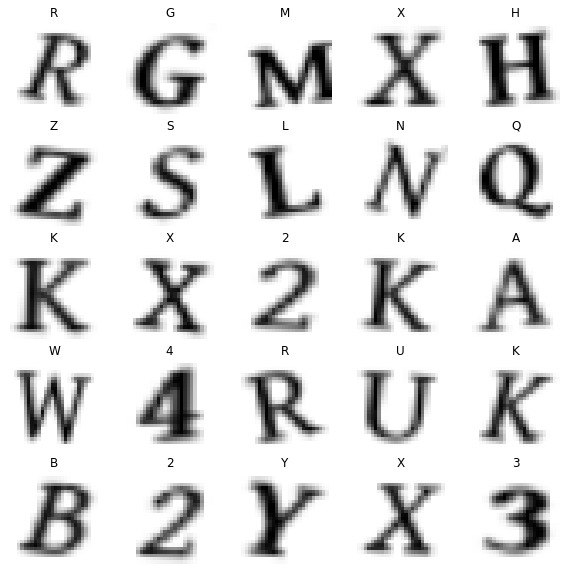

In [14]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## 3.2 Model

In [83]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [33]:
num_classes = len(class_names)
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(20, (5,5), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    
  layers.Conv2D(50, (5,5), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    
  #layers.Conv2D(64, 3, padding='same', activation='relu'),
  #layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(500, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 20)        1520      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2450)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               1

In [37]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
History = model.fit(train_data, validation_data=test_data, epochs=15)

Epoch 1/15
969/969 [==============================] - 39s 40ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0087 - val_accuracy: 0.9987
Epoch 2/15
969/969 [==============================] - 41s 42ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0119 - val_accuracy: 0.9973
Epoch 3/15
969/969 [==============================] - 42s 43ms/step - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.0151 - val_accuracy: 0.9982
Epoch 4/15
969/969 [==============================] - 42s 43ms/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0.0170 - val_accuracy: 0.9977
Epoch 5/15
969/969 [==============================] - 42s 44ms/step - loss: 0.0017 - accuracy: 0.9993 - val_loss: 0.0150 - val_accuracy: 0.9978
Epoch 6/15
969/969 [==============================] - 42s 43ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0110 - val_accuracy: 0.9979
Epoch 7/15
969/969 [==============================] - 43s 44ms/step - loss: 0.0068 - accuracy: 0.9988 - val_loss: 0.0229 - val_accuracy:

## 3.3 Performance

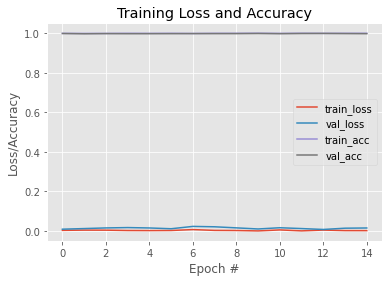

In [48]:
import numpy as np
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), History.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), History.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 15), History.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 15), History.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

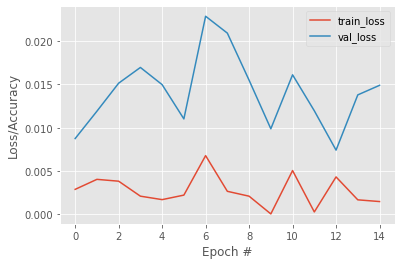

In [46]:
plt.figure()
plt.plot(np.arange(0, 15), History.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), History.history["val_loss"], label="val_loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

## 3.4 Save model

In [49]:
model.save("captcha_model_v1.hdf5")

# 4. Training V2

We'll use preprocessImage function that we created before and we'll load the data manuelly

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [16]:
data = []
labels = []
list_images = glob.glob(os.path.join(data_path, "*\*"))
for imag in list_images:
    image = cv2.imread(imag)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = preprocessImage(image, 28, 28)
    
    # Add a third channel dimension to the image to make Keras happy
    image = np.expand_dims(image, axis=2)
    data.append(image)
    label = imag.split(os.path.sep)[-2]
    labels.append(label)

data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# Split the training data into separate train and test sets
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.25, random_state=0)
# Convert the labels (letters) into one-hot encodings that Keras can work with
lb = LabelBinarizer().fit(Y_train)
Y_train = lb.transform(Y_train)
Y_test = lb.transform(Y_test)

In [17]:
X_test.shape

(9686, 28, 28, 1)

## 4.1 Model

In [84]:
model2 = Sequential([
  
  layers.Conv2D(20, (5,5), padding='same', input_shape = (28,28,1), activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    
  layers.Conv2D(50, (5,5), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

  layers.Flatten(),
  layers.Dense(500, activation='relu'),
  layers.Dense(32, activation='softmax')
])

In [88]:
# Ask Keras to build the TensorFlow model behind the scenes
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the neural network
h = model2.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=15)

Epoch 1/15
909/909 [==============================] - 24s 26ms/step - loss: 0.1673 - accuracy: 0.9598 - val_loss: 0.0210 - val_accuracy: 0.9950
Epoch 2/15
909/909 [==============================] - 28s 31ms/step - loss: 0.0112 - accuracy: 0.9971 - val_loss: 0.0109 - val_accuracy: 0.9973
Epoch 3/15
909/909 [==============================] - 29s 32ms/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.0076 - val_accuracy: 0.9976
Epoch 4/15
909/909 [==============================] - 30s 33ms/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.0077 - val_accuracy: 0.9980
Epoch 5/15
909/909 [==============================] - 30s 33ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0073 - val_accuracy: 0.9987
Epoch 6/15
909/909 [==============================] - 31s 34ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.0119 - val_accuracy: 0.9970
Epoch 7/15
909/909 [==============================] - 31s 34ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0058 - val_accuracy:

## 4.2 Performance

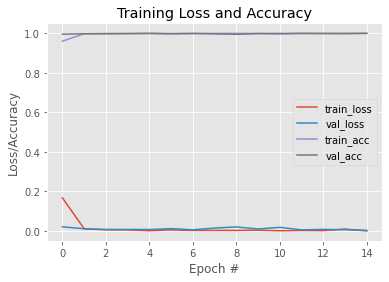

In [90]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), h.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 15), h.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 15), h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

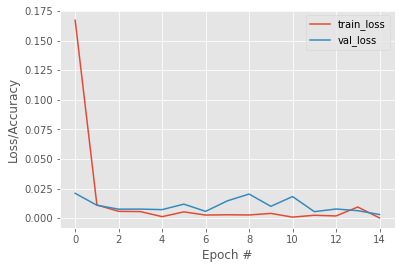

In [92]:
plt.figure()
plt.plot(np.arange(0, 15), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), h.history["val_loss"], label="val_loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

## 4.3 Save model

In [93]:
model2.save("captcha_model_v2.hdf5")

# 5. Testing

In [8]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

## 5.1 Test the 1st model

In [54]:
model = load_model("captcha_model_v1.hdf5")

In [55]:
data_path = os.path.join(os.getcwd(),'data')
class_names = [i[-1:] for i in glob.glob(os.path.join(data_path, "*"))]

In [56]:
captcha_image_files = glob.glob(os.path.join(curr_path, "*"))

In [59]:
c_i_f = np.random.choice(captcha_image_files, size=(5,), replace=False)
out = []
for image_file in c_i_f:
    # Load the image and convert it to grayscale
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Add some extra padding around the image
    image = cv2.copyMakeBorder(image, 20, 20, 20, 20, cv2.BORDER_REPLICATE)

    # threshold the image (convert it to pure black and white)
    thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # find the contours (continuous blobs of pixels) the image
    contours,_ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Hack for compatibility with different OpenCV versions
    #contours = contours[0] if imutils.is_cv2() else contours[1]

    letter_image_regions = []
       # Now we can loop through each of the four contours and extract the letter
    # inside of each one
    for contour in contours:
        # Get the rectangle that contains the contour
        (x, y, w, h) = cv2.boundingRect(contour)

        # Compare the width and height of the contour to detect letters that
        # are conjoined into one chunk
        if w / h > 1.25:
            # This contour is too wide to be a single letter!
            # Split it in half into two letter regions!
            half_width = int(w / 2)
            letter_image_regions.append((x, y, half_width, h))
            letter_image_regions.append((x + half_width, y, half_width, h))
        else:
            # This is a normal letter by itself
            letter_image_regions.append((x, y, w, h))

    # If we found more or less than 4 letters in the captcha, our letter extraction
    # didn't work correcly. Skip the image instead of saving bad training data!
    if len(letter_image_regions) != 4:
        continue

    # Sort the detected letter images based on the x coordinate to make sure
    # we are processing them from left-to-right so we match the right image
    # with the right letter
    letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])
    # Create an output image and a list to hold our predicted letters
    output = cv2.merge([image] * 3)
    predictions = []

    # loop over the lektters
    for letter_bounding_box in letter_image_regions:
        # Grab the coordinates of the letter in the image
        x, y, w, h = letter_bounding_box

        # Extract the letter from the original image with a 2-pixel margin around the edge
        letter_image = image[y - 2:y + h + 2, x - 2:x + w + 2]

        # Re-size the letter image to 28x28 pixels to match training data
        letter_image = cv2.cvtColor(letter_image, cv2.COLOR_GRAY2RGB)
        letter_image = cv2.resize(letter_image, (28, 28))
        #print(letter_image.shape)
        letter_image = letter_image.reshape(1,28,28,3)
        #print(letter_image.shape)
        
        # Ask the neural network to make a prediction
        prediction = model.predict_classes(letter_image)

        letter = class_names[prediction[0]]
        predictions.append(letter)

        # draw the prediction on the output image
        cv2.rectangle(output, (x - 2, y - 2), (x + w + 4, y + h + 4), (0, 255, 0), 1)
        cv2.putText(output, letter, (x - 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 255, 0), 2)
    # Print the captcha's text
    captcha_text = "".join(predictions)
    print("CAPTCHA text is: {}".format(captcha_text))
    out.append(output)
    # Show the annotated image
    cv2.imshow("Output", output)
    cv2.waitKey()

cv2.destroyAllWindows()

CAPTCHA text is: 2PFS
CAPTCHA text is: PW5U
CAPTCHA text is: 47QJ
CAPTCHA text is: H2RY
CAPTCHA text is: FPVS


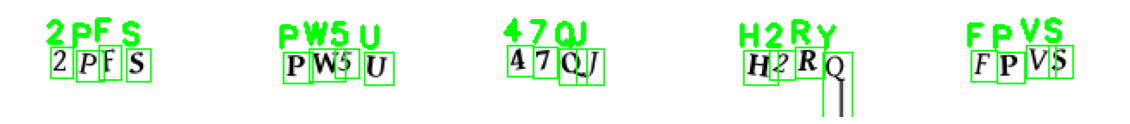

In [60]:
plt.figure(figsize=(20, 20))
for i,img in enumerate(out[:]):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")

## 5.2 Test the 2d model

In [9]:
model2 = load_model("captcha_model_v2.hdf5")

In [51]:
c_i_f = np.random.choice(captcha_image_files, size=(10,), replace=False)
out = []
for image_file in c_i_f:
    # Load the image and convert it to grayscale
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Add some extra padding around the image
    image = cv2.copyMakeBorder(image, 20, 20, 20, 20, cv2.BORDER_REPLICATE)

    # threshold the image (convert it to pure black and white)
    thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # find the contours (continuous blobs of pixels) the image
    contours,_ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    letter_image_regions = []
       # Now we can loop through each of the four contours and extract the letter
    # inside of each one
    for contour in contours:
        # Get the rectangle that contains the contour
        (x, y, w, h) = cv2.boundingRect(contour)

        # Compare the width and height of the contour to detect letters that
        # are conjoined into one chunk
        if w / h > 1.25:
            # This contour is too wide to be a single letter!
            # Split it in half into two letter regions!
            half_width = int(w / 2)
            letter_image_regions.append((x, y, half_width, h))
            letter_image_regions.append((x + half_width, y, half_width, h))
        else:
            # This is a normal letter by itself
            letter_image_regions.append((x, y, w, h))

    # If we found more or less than 4 letters in the captcha, our letter extraction
    # didn't work correcly. Skip the image instead of saving bad training data!
    if len(letter_image_regions) != 4:
        continue
        
    # Sort the detected letter images based on the x coordinate to make sure
    # we are processing them from left-to-right so we match the right image
    # with the right letter
    letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])
    # Create an output image and a list to hold our predicted letters
    output = cv2.merge([image] * 3)
    predictions = []

    # loop over the lektters
    for letter_bounding_box in letter_image_regions:
        # Grab the coordinates of the letter in the image
        x, y, w, h = letter_bounding_box

        # Extract the letter from the original image with a 2-pixel margin around the edge
        letter_image = image[y - 2:y + h + 2, x - 2:x + w + 2]
        # Re-size the letter image to 28x28 pixels to match training data
        letter_image = preprocessImage(letter_image, 28, 28)
        # Turn the single image into a 4d list of images to make Keras happy
        letter_image = np.expand_dims(letter_image, axis=2)
        letter_image = np.expand_dims(letter_image, axis=0)
        # Ask the neural network to make a prediction
        prediction = model2.predict(letter_image)

        # Convert the one-hot-encoded prediction back to a normal letter
        letter = lb.inverse_transform(prediction)[0]
        predictions.append(letter)

        # draw the prediction on the output image
        cv2.rectangle(output, (x - 2, y - 2), (x + w + 4, y + h + 4), (0, 255, 0), 1)
        cv2.putText(output, letter, (x - 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 255, 0), 2)
    # Print the captcha's text
    captcha_text = "".join(predictions)
    print("CAPTCHA text is: {}".format(captcha_text))
    out.append(output)
    # Show the annotated image
    cv2.imshow("Output", output)
    cv2.waitKey()

cv2.destroyAllWindows()

CAPTCHA text is: 7GYK
CAPTCHA text is: T36G
CAPTCHA text is: USBQ
CAPTCHA text is: GF3H
CAPTCHA text is: LM38
CAPTCHA text is: FUTR
CAPTCHA text is: 6S9L
CAPTCHA text is: 3QZL
CAPTCHA text is: SSNS
CAPTCHA text is: 68KJ


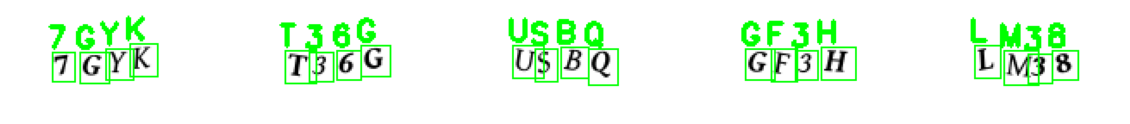

In [52]:
plt.figure(figsize=(20, 20))
for i,img in enumerate(out[:5]):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")